# KNN iris 다중분류 (Multiclass Classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
iris = pd.read_csv('iris.csv')

In [11]:
def get_iris(mode=None):
    iris = pd.read_csv('iris.csv')
    df = iris.drop(['Id'], axis=1).copy()
    df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']
   
    if(mode == 'bin'):
        df = df.loc[df['Species'] != 'Iris-virginica']
       
    df['Species'] = df['Species'].map({
        'Iris-setosa':0,
        'Iris-versicolor':1,
        'Iris-virginica':2
    })
    X = df.drop(['Species'], axis=1)
    y = df['Species']

    X, y = shuffle(X, y, random_state=2022)    #random_stae : X, y 값 고정
    num = int(len(y)*0.8)        #len(y)=100
   
    X_train = X.iloc[:num,:]     #80
    X_test  = X.iloc[num:,:]     #20
    y_train = y.iloc[:num]       #80
    y_test  = y.iloc[num:]       #20
   
    for col in X_train.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col] - mu)/std
        X_test[col] = (X_test[col] - mu)/std

    return X_train, X_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = get_iris()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [13]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### 학습

In [14]:
from sklearn.neighbors import KNeighborsClassifier
scores = []

for i in range(3, 30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    s = clf.score(X_train, y_train)
    scores.append(s)

In [15]:
clf.score(X_test, y_test)

1.0

In [16]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
s = clf.score(X_train, y_train)
print('accuracy : ', s)

accuracy :  0.975


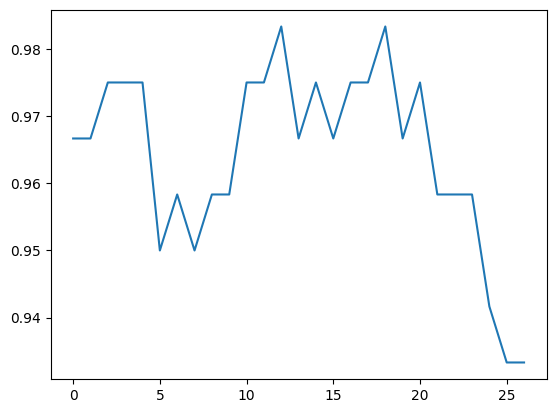

In [17]:
plt.plot(scores)

In [ ]:
### 최종

In [18]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
### 예측

In [19]:
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 0, 0, 1, 2, 2], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, average='macro')    #다중분류는 average='macro' 추가
    rec = recall_score(y_true, y_pred, average='macro')

    print('accuraccy:', acc)
    print('precision:', pre)
    print('recall:', rec)

In [21]:
print_score(y_test, y_pred)

accuraccy: 0.9333333333333333
precision: 0.9333333333333332
recall: 0.9393939393939394


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred, average='binary'):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, average=average)   
    rec = recall_score(y_true, y_pred, average=average)

    print('accuraccy:', acc)
    print('precision:', pre)
    print('recall:', rec)

In [23]:
print_score(y_test, y_pred, average='macro')

accuraccy: 0.9333333333333333
precision: 0.9333333333333332
recall: 0.9393939393939394
